# Demographics Analysis

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt
import pandas as pd

### Authorization

In [ ]:
cred = credentials.Certificate("/your/path.here.json")
firebase_admin.initialize_app(cred)

### Users Fetch

In [5]:
db = firestore.client()

users_ref = db.collection("users")
docs = users_ref.stream()

user_data = []
for doc in docs:
    user_data.append(doc.to_dict())

print(user_data)

[{'birthYear': '1998', 'trials': [{'responseTime': 1622, 'step': 2}, {'responseTime': 2208, 'step': 1}, {'responseTime': 1992, 'step': 7}, {'responseTime': 3011, 'step': 3}, {'responseTime': 2644, 'step': 3}, {'responseTime': 1890, 'step': 2}, {'responseTime': 1805, 'step': 5}, {'responseTime': 1673, 'step': 5}, {'responseTime': 4064, 'step': 3}, {'responseTime': 2342, 'step': 1}, {'responseTime': 8363, 'step': 1}, {'responseTime': 1522, 'step': 1}, {'responseTime': 3747, 'step': 2}, {'responseTime': 2923, 'step': 4}, {'responseTime': 1973, 'step': 6}, {'responseTime': 1973, 'step': 4}, {'responseTime': 2142, 'step': 1}, {'responseTime': 2862, 'step': 6}, {'responseTime': 1972, 'step': 3}, {'responseTime': 4565, 'step': 6}, {'responseTime': 1891, 'step': 4}, {'responseTime': 2259, 'step': 2}, {'responseTime': 1870, 'step': 6}, {'responseTime': 5773, 'step': 7}, {'responseTime': 2727, 'step': 6}, {'responseTime': 3695, 'step': 7}, {'responseTime': 2007, 'step': 5}, {'responseTime': 1488

## Race Anaysis

In [38]:
races = [user.get("races") for user in user_data if user.get("races") is not None]
races_control = [user.get("races") for user in user_data if user.get("group") == "control"]
races_target = [user.get("races") for user in user_data if user.get("group") != "control"]

print(races)
print(races_control)
print(races_target)

[['Hispanic / Latino'], ['Other / Prefer not to say'], ['Hispanic / Latino'], ['Hispanic / Latino'], ['Other / Prefer not to say'], ['Other / Prefer not to say'], ['Asian'], ['Asian'], ['Hispanic / Latino'], ['Hispanic / Latino'], ['Hispanic / Latino']]
[['Other / Prefer not to say'], ['Other / Prefer not to say'], ['Asian'], ['Hispanic / Latino']]
[['Hispanic / Latino'], ['Other / Prefer not to say'], ['Hispanic / Latino'], ['Hispanic / Latino'], ['Asian'], ['Hispanic / Latino'], ['Hispanic / Latino']]


In [40]:
# races_options = ["White", "Hispanic / Latino", "Black", "Indigenous", "Asian", "Middle Eastern / North African", "Other / Prefer not to say"]

race_counts = pd.Series([race for sublist in races for race in sublist]).value_counts()
race_counts_control = pd.Series([race for sublist in races_control for race in sublist]).value_counts()
race_counts_target = pd.Series([race for sublist in races_target for race in sublist]).value_counts()

print(race_counts)
print(race_counts_control)
print(race_counts_target)


Hispanic / Latino            6
Other / Prefer not to say    3
Asian                        2
Name: count, dtype: int64
Other / Prefer not to say    2
Asian                        1
Hispanic / Latino            1
Name: count, dtype: int64
Hispanic / Latino            5
Other / Prefer not to say    1
Asian                        1
Name: count, dtype: int64


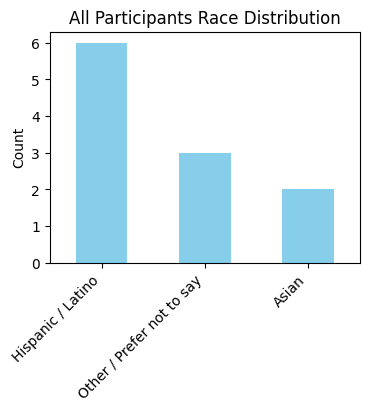

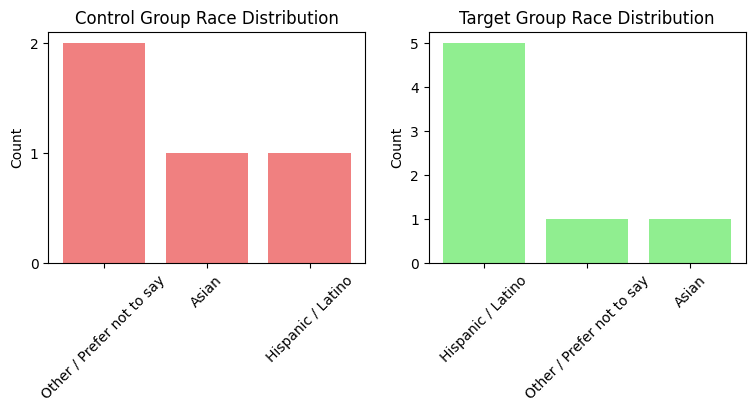

In [72]:
race_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.ylabel("Count")
plt.title("All Participants Race Distribution")
plt.xticks(rotation=45, ha="right")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

axs[0].bar(race_counts_control.index, race_counts_control.values, color='lightcoral')
axs[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0].set_title("Control Group Race Distribution")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(race_counts_target.index, race_counts_target.values, color='lightgreen')
axs[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1].set_title("Target Group Race Distribution")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)

## Gender Analysis

In [73]:
genders = [user.get("gender") for user in user_data if user.get("gender") is not None]
genders_control = [user.get("gender") for user in user_data if user.get("group") == "control"]
genders_target = [user.get("gender") for user in user_data if user.get("group") != "control"]

print(genders)
print(genders_control)
print(genders_target)

['man', 'man', 'woman', 'man', 'woman', 'man', 'man', 'woman', 'woman', 'man', 'woman']
['woman', 'man', 'woman', 'woman']
['man', 'man', 'woman', 'man', 'man', 'man', 'woman']


In [74]:
gender_counts = pd.Series([gender for gender in genders]).value_counts()
gender_counts_control = pd.Series([gender for gender in genders_control]).value_counts()
gender_counts_target = pd.Series([gender for gender in genders_target]).value_counts()


print(gender_counts)
print(gender_counts_control)
print(gender_counts_target)

man      6
woman    5
Name: count, dtype: int64
woman    3
man      1
Name: count, dtype: int64
man      5
woman    2
Name: count, dtype: int64


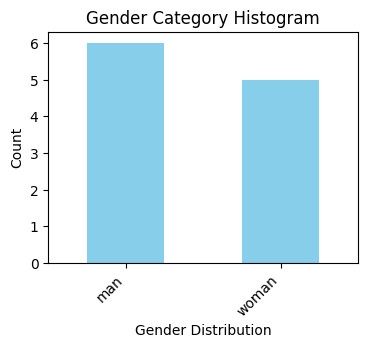

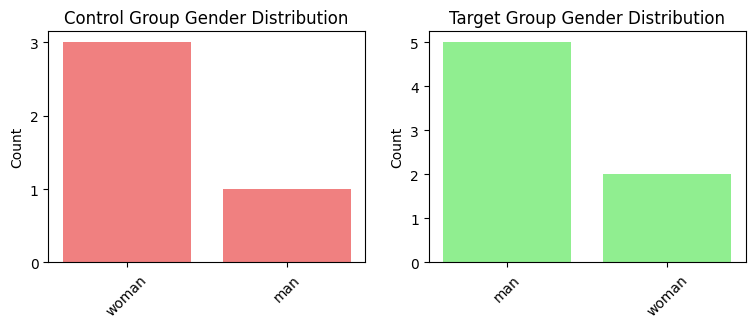

In [77]:
gender_counts.plot(kind='bar', color='skyblue', figsize=(4, 3))
plt.xlabel("Gender Distribution")
plt.ylabel("Count")
plt.title("Gender Category Histogram")
plt.xticks(rotation=45, ha="right")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))

axs[0].bar(gender_counts_control.index, gender_counts_control.values, color='lightcoral')
axs[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[0].set_title("Control Group Gender Distribution")
axs[0].set_ylabel("Count")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(gender_counts_target.index, gender_counts_target.values, color='lightgreen')
axs[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axs[1].set_title("Target Group Gender Distribution")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)

# Age Analysis

In [29]:
birthYears = [user.get("birthYear") for user in user_data]
birthYears_control = [user.get("birthYear") for user in user_data if user.get("group") == "control"]
birthYears_target = [user.get("birthYear") for user in user_data if user.get("group") != "control"]

birthYears = list(map(int, birthYears))
birthYears_control = list(map(int, birthYears_control))
birthYears_target = list(map(int, birthYears_target))

print(birthYears)
print(birthYears_control)
print(birthYears_target)

[1998, 2007, 1997, 1994, 1972, 1971, 1996, 1997, 1998, 2001, 1998]
[1972, 1971, 1997, 1998]
[1998, 2007, 1997, 1994, 1996, 2001, 1998]


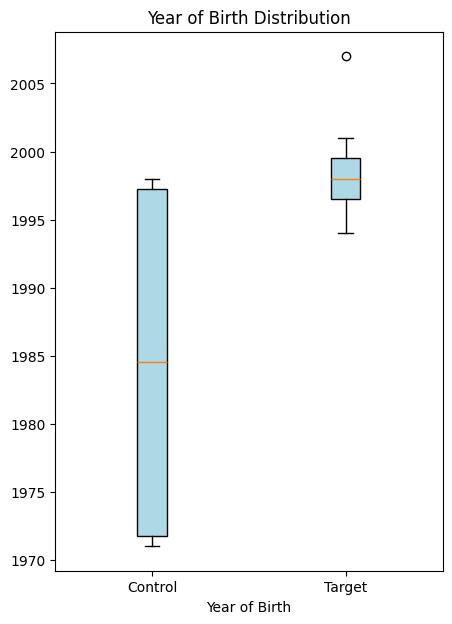

In [36]:
# Plot box plot for year of birth
plt.figure(figsize=(5, 7))
plt.boxplot([birthYears_control, birthYears_target], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"), tick_labels=['Control', 'Target'])
plt.xlabel("Year of Birth")
plt.title("Year of Birth Distribution")
plt.show()
